1768 328
Epoch: 1
Epoch: 001, Training: Loss: 1.7620, Accuracy: 21.6063%,Valid: Loss: 1.7335, Accuracy: 14.0244%,Time: 6.8450s
Epoch: 2
Epoch: 002, Training: Loss: 1.7355, Accuracy: 21.7760%,Valid: Loss: 1.7343, Accuracy: 18.5976%,Time: 5.9468s
Epoch: 3
Epoch: 003, Training: Loss: 1.7798, Accuracy: 22.1154%,Valid: Loss: 1.7258, Accuracy: 25.3049%,Time: 6.6923s
Epoch: 4
Epoch: 004, Training: Loss: 1.7176, Accuracy: 23.8688%,Valid: Loss: 2.6923, Accuracy: 32.9268%,Time: 6.7534s
Epoch: 5
Epoch: 005, Training: Loss: 1.7220, Accuracy: 23.7557%,Valid: Loss: 1.7297, Accuracy: 21.3415%,Time: 6.1442s
Epoch: 6
Epoch: 006, Training: Loss: 1.7618, Accuracy: 28.1109%,Valid: Loss: 1.5613, Accuracy: 28.3537%,Time: 5.8264s
Epoch: 7
Epoch: 007, Training: Loss: 1.6103, Accuracy: 31.5611%,Valid: Loss: 1.7381, Accuracy: 32.0122%,Time: 6.3848s
Epoch: 8
Epoch: 008, Training: Loss: 1.5598, Accuracy: 34.2195%,Valid: Loss: 1.7023, Accuracy: 29.5732%,Time: 6.1092s
Epoch: 9
Epoch: 009, Training: Loss: 1.6070, Ac

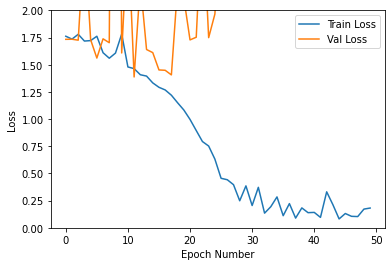

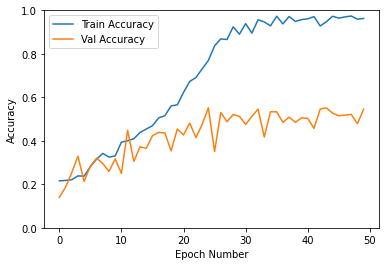

1768 328
Epoch: 1
Epoch: 001, Training: Loss: 7.3903, Accuracy: 20.1357%,Valid: Loss: 1.7526, Accuracy: 22.8659%,Time: 22.2468s
Epoch: 2
Epoch: 002, Training: Loss: 5.8363, Accuracy: 21.8891%,Valid: Loss: 1.7396, Accuracy: 25.3049%,Time: 21.1061s
Epoch: 3
Epoch: 003, Training: Loss: 1.7318, Accuracy: 22.7376%,Valid: Loss: 1.7180, Accuracy: 25.3049%,Time: 22.0370s
Epoch: 4
Epoch: 004, Training: Loss: 1.7241, Accuracy: 22.5113%,Valid: Loss: 1.7177, Accuracy: 25.3049%,Time: 21.6327s
Epoch: 5
Epoch: 005, Training: Loss: 1.7266, Accuracy: 23.1335%,Valid: Loss: 1.7148, Accuracy: 25.3049%,Time: 21.3561s
Epoch: 6
Epoch: 006, Training: Loss: 1.7252, Accuracy: 22.1719%,Valid: Loss: 1.7208, Accuracy: 18.5976%,Time: 20.7498s
Epoch: 7
Epoch: 007, Training: Loss: 1.7253, Accuracy: 21.7760%,Valid: Loss: 1.7209, Accuracy: 18.5976%,Time: 21.1344s
Epoch: 8
Epoch: 008, Training: Loss: 1.7248, Accuracy: 21.6629%,Valid: Loss: 1.7153, Accuracy: 25.3049%,Time: 20.5632s
Epoch: 9
Epoch: 009, Training: Loss: 1.

RuntimeError: write(): fd 121 failed with No space left on device

In [1]:
import torchvision.models as models
import torch.optim as optim
from Train import trainmodel
from alexnet import *
from vgg import *
from densenet import *
from mobilenet import *
from ResNet import *
batch_size = 36
device = 8
model_name_list = ["alexnet","vgg11_bn","vgg19_bn","mobilenet_v2",\
                   "densenet121","resnet18","resnet34","resnet101"]
model_list = [alexnet(pretrained=False),vgg19_bn(pretrained=False),\
              vgg11_bn(pretrained=False),mobilenet_v2(pretrained=False),\
              densenet121(pretrained=False),\
              resnet18(3,6),resnet34(3,6),resnet101(3,6)]
lossfunc = torch.nn.CrossEntropyLoss().cuda(device)
i = 0
for models in model_list:
    file_name = model_name_list[i]+str(batch_size)+"adadelta"
    optimizer = optim.Adadelta(models.parameters(),weight_decay=1e-4)
    trainmodel(model_name=models,loss = lossfunc,batchsize=batch_size,opti=optimizer,\
                epoch_num=50,device_num=device,filename=file_name)
    i+=1
